In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
data = pd.read_csv('Data_PCLab1_Stock.csv')

# Task 1

In [794]:
data.head()

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.25,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.73,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.80,194.449997,180.520004,26.760000,318.590851,1314.500000


In [795]:
print('The number of stocks is', str(len(data['AAPL'])))

The number of stocks is 2159


In [796]:
for i in range(9):
    print('In', str(data.columns[i+1]), 'there exist null values:', str(data[data.columns[i+1]].isnull().any()))

In AAPL there exist null values: False
In BA there exist null values: False
In T there exist null values: False
In MGM there exist null values: False
In AMZN there exist null values: False
In IBM there exist null values: False
In TSLA there exist null values: False
In GOOG there exist null values: False
In sp500 there exist null values: False


In [797]:
print('The avg market value of S&P500 is', data['sp500'].mean())

The avg market value of S&P500 is 2218.7495540592877


In [798]:
names = data.columns[1:]
stds = [data[names[i]].std() for i in range(len(names))]
d = pd.DataFrame()
d['Stocks/Indexes'] = names
d['Std'] = stds
d.sort_values('Std').reset_index()

,index,Stocks/Indexes,Std
0,2,T,3.207490
1,3,MGM,6.963847
2,5,IBM,25.561938
3,0,AAPL,70.827601
4,1,BA,103.678586
5,6,TSLA,210.988003
6,7,GOOG,334.448057
7,8,sp500,537.321727
8,4,AMZN,697.838905


T has the lowest dispersion in dollar value

In [799]:
print('The max value of AMZN stock is', str(data['AMZN'].max()))

The max value of AMZN stock is 3225.0


# Task 2 

In [4]:
#Plotting Function

def plot(d, title, ylabel):
    x = d.iloc[:,0]
    plt.rcParams["figure.figsize"] = (10,7)
    for i in range(len(d.columns[1:])):
        plt.plot(x, d[d.columns[i+1]], label = d.columns[i+1])
    plt.xticks([d['Date'][i] for i in range(0, len(d['Date']), len(d['Date'])//5)])
    plt.xlabel('Date')
    plt.ylabel(ylabel)
    plt.legend()
    plt.title(title)
    plt.grid(True)
    plt.show()

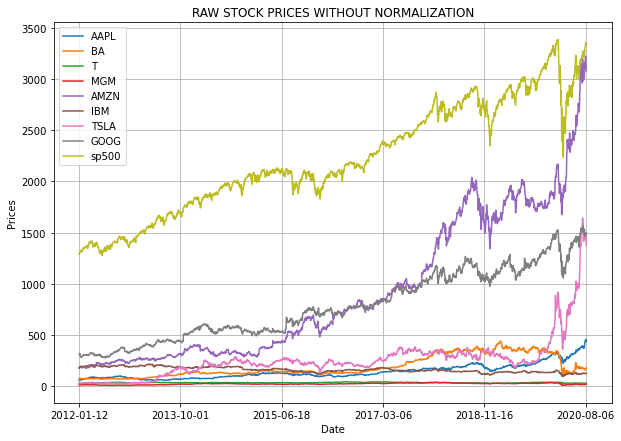

In [801]:
plot(data, 'RAW STOCK PRICES WITHOUT NORMALIZATION', 'Prices')

# Task 3 

In [802]:
# Normalization
div = data.iloc[0, 1:]
for i in range(0, len(data['Date'])):
    data.iloc[i, 1:] = data.iloc[i, 1:]/div

In [803]:
data.head()

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2012-01-13,0.996251,0.987949,0.998340,1.018137,1.014153,0.992301,0.806726,0.992615,0.995052
2,2012-01-17,1.007855,0.996424,1.004316,1.009893,1.032570,0.996954,0.941593,0.998317,0.998587
3,2012-01-18,1.018320,0.994040,1.006972,1.049464,1.076792,1.002880,0.949027,1.005193,1.009680
4,2012-01-19,1.015093,1.000662,1.009960,1.055235,1.105269,0.999834,0.947257,1.015771,1.014666


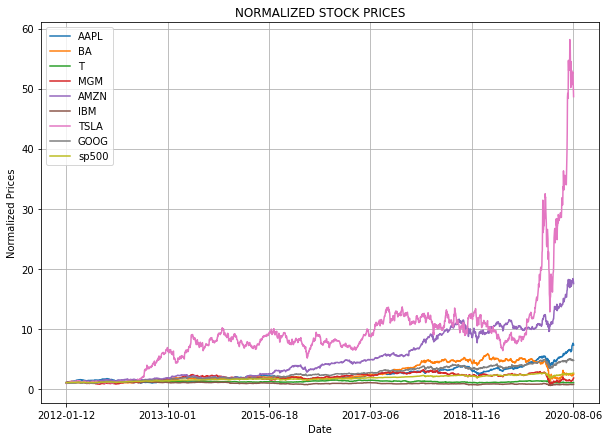

In [804]:
plot(data, 'NORMALIZED STOCK PRICES', 'Normalized Prices')

# Task 4

In [5]:
# Returns Function

def returns_f(d):
    r = pd.DataFrame()
    r['Date'] = d['Date'][1:]
    for i in range(len(d.columns) - 1):
        r[d.columns[i+1]] = np.zeros(len(d['Date'])-1)
    for i in range(1, len(d['Date'])):
        r.iloc[i-1, 1:] = (d.iloc[i, 1:]-d.iloc[i-1, 1:])/d.iloc[i-1, 1:]
    return r

In [6]:
data = pd.read_csv('Data_PCLab1_Stock.csv')

In [7]:
r = returns_f(data)
r = r.reset_index(drop = True)

In [8]:
r.head()

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-13,-0.003749,-0.012051,-0.001660,0.018137,0.014153,-0.007699,-0.193274,-0.007385,-0.004948
1,2012-01-17,0.011648,0.008579,0.005986,-0.008097,0.018159,0.004689,0.167179,0.005744,0.003553
2,2012-01-18,0.010384,-0.002392,0.002645,0.039184,0.042827,0.005944,0.007895,0.006889,0.011108
3,2012-01-19,-0.003169,0.006661,0.002967,0.005499,0.026446,-0.003038,-0.001865,0.010523,0.004939
4,2012-01-20,-0.017417,-0.000529,0.002959,-0.012500,-0.018102,0.044316,-0.005979,-0.083775,0.000669


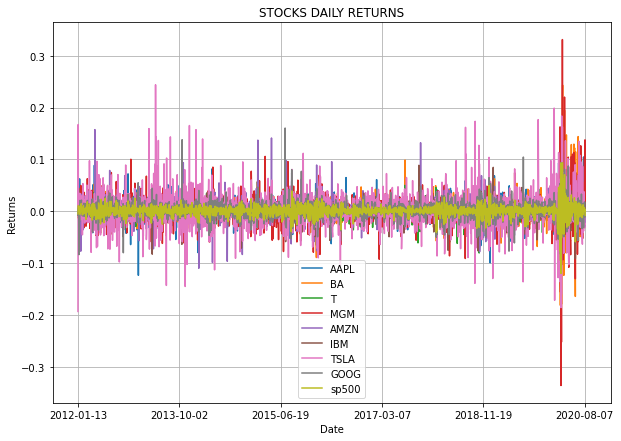

In [809]:
plot(r, 'STOCKS DAILY RETURNS', 'Returns')

# Task 5

In [9]:
def corr(d):
    c = pd.DataFrame()
    for i in range(len(d.columns[1:])):
        for j in range(len(d.columns[1:])):
                c.loc[d.columns[i+1], d.columns[j+1]] = d[d.columns[i+1]].corr(d[d.columns[j+1]])
    return c

In [10]:
#Correlation Matrix
corr(r)

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
AAPL,1.000000,0.385249,0.341373,0.384088,0.410233,0.434534,0.288534,0.509124,0.657320
BA,0.385249,1.000000,0.401602,0.554229,0.267466,0.479264,0.250946,0.388048,0.641826
T,0.341373,0.401602,1.000000,0.340166,0.233145,0.484219,0.152515,0.353695,0.617463
MGM,0.384088,0.554229,0.340166,1.000000,0.309016,0.441631,0.311879,0.439141,0.631449
AMZN,0.410233,0.267466,0.233145,0.309016,1.000000,0.339589,0.310083,0.575283,0.539560
IBM,0.434534,0.479264,0.484219,0.441631,0.339589,1.000000,0.245610,0.458816,0.703935
TSLA,0.288534,0.250946,0.152515,0.311879,0.310083,0.245610,1.000000,0.322804,0.387920
GOOG,0.509124,0.388048,0.353695,0.439141,0.575283,0.458816,0.322804,1.000000,0.684571
sp500,0.657320,0.641826,0.617463,0.631449,0.539560,0.703935,0.387920,0.684571,1.000000


<AxesSubplot:>

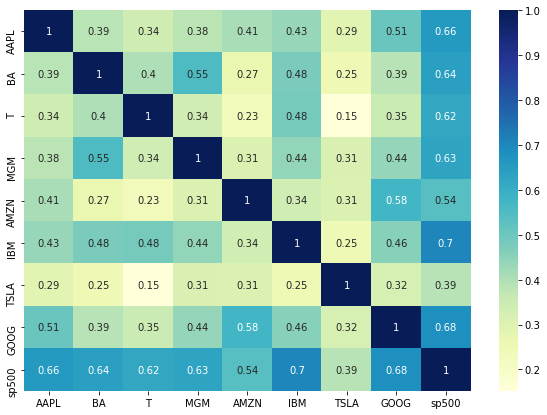

In [812]:
#Heatmap
sb.heatmap(corr(r), cmap = 'YlGnBu', annot = True)

In [813]:
# Google and Amazon are the two most correlated stocks.
pd.DataFrame(corr(r).loc['sp500'].sort_values(ascending = False))

,sp500
sp500,1.000000
IBM,0.703935
GOOG,0.684571
AAPL,0.657320
BA,0.641826
MGM,0.631449
T,0.617463
AMZN,0.539560
TSLA,0.387920


In [814]:
pd.DataFrame(corr(r).loc['BA'].sort_values(ascending = False))

,BA
BA,1.000000
sp500,0.641826
MGM,0.554229
IBM,0.479264
T,0.401602
GOOG,0.388048
AAPL,0.385249
AMZN,0.267466
TSLA,0.250946


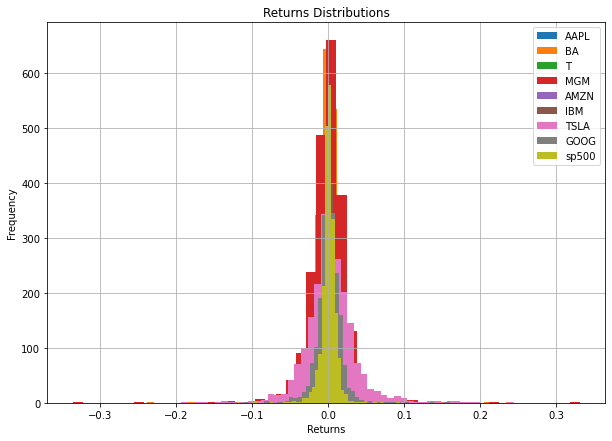

In [815]:
# Histograms
for i in range(len(r.columns[1:])):
    plt.hist(r[r.columns[i+1]], bins = 50, label = r.columns[i+1])
    
plt.title('Returns Distributions')
plt.ylabel('Frequency')
plt.xlabel('Returns')
plt.grid(True)
plt.legend()
plt.show()

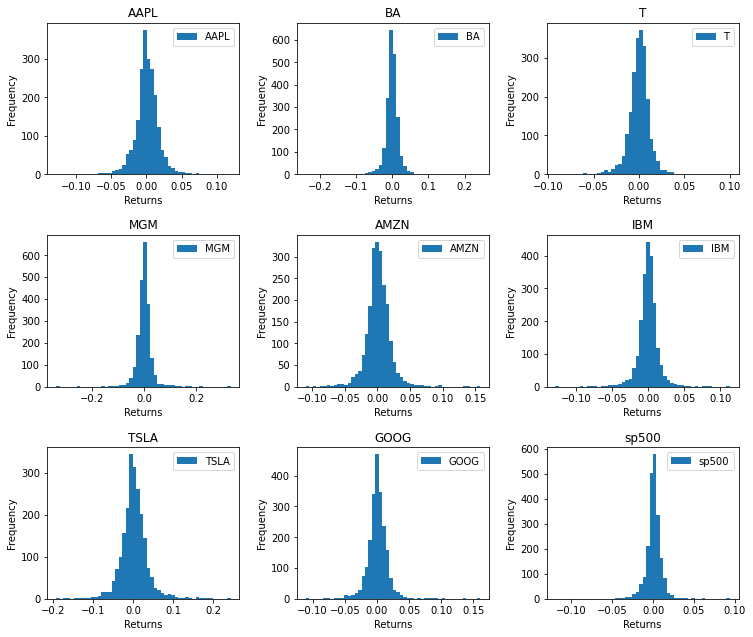

In [816]:
plt.figure(figsize=(12, 10))
for i in range(9):
    plt.subplot(3,3,i+1).set_title(r.columns[i+1])
    plt.hist(r[r.columns[i+1]], bins = 50, label = r.columns[i+1])
    plt.legend()
    plt.xlabel('Returns')
    plt.ylabel('Frequency')
#plt.subplot_tool()
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.4)
plt.show()

# Task 6

In [11]:
stocks = r.columns[1:]
avgs = np.zeros(9)
stds = np.zeros(9)
for i in range(9):
    avgs[i] = r[r.columns[i+1]].mean()
    stds[i] = r[r.columns[i+1]].std()
rf = 0 #06/10/2022

In [12]:
#Covariance Function
def cov(x,y):
    return np.mean(x*y) - np.mean(x)*np.mean(y)

In [13]:
#Variance Covariance Matrix
cov_matrix = pd.DataFrame()
for i in range(9):
    for j in range(9):
        cov_matrix.loc[stocks[i], stocks[j]] = cov(r[stocks[i]], r[stocks[j]])

In [14]:
cov_matrix

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
AAPL,0.000315,0.000155,0.000077,0.000187,0.000140,0.000110,0.000176,0.000143,0.000122
BA,0.000155,0.000511,0.000115,0.000344,0.000117,0.000155,0.000195,0.000139,0.000152
T,0.000077,0.000115,0.000160,0.000118,0.000057,0.000088,0.000066,0.000071,0.000082
MGM,0.000187,0.000344,0.000118,0.000754,0.000164,0.000174,0.000294,0.000191,0.000182
AMZN,0.000140,0.000117,0.000057,0.000164,0.000372,0.000094,0.000205,0.000176,0.000109
IBM,0.000110,0.000155,0.000088,0.000174,0.000094,0.000205,0.000121,0.000104,0.000106
TSLA,0.000176,0.000195,0.000066,0.000294,0.000205,0.000121,0.001177,0.000176,0.000140
GOOG,0.000143,0.000139,0.000071,0.000191,0.000176,0.000104,0.000176,0.000251,0.000114
sp500,0.000122,0.000152,0.000082,0.000182,0.000109,0.000106,0.000140,0.000114,0.000110


In [15]:
n = 1000
returns = np.zeros(n)
vols = np.zeros(n)
s_ratios = np.zeros(n)
weights_all = dict()

for i in range(n):
    weights = np.random.uniform(100, size=9)
    weights /= weights.sum()
    weights_all[i] = weights
    returns1 = (weights*r.iloc[:,1:]).sum(axis = 1)
    returns[i] = (1 + returns1.mean())**252 - 1
    for j in range(9):
        for k in range(9):
            vols[i] += weights[j]*weights[k]*cov_matrix.iloc[j,k]
    vols[i] = np.sqrt(vols[i])
    s_ratios[i] = (returns[i]-rf)/vols[i]

In [16]:
print('The maximum sharp ratio is', max(s_ratios))
print('The associated weights are', weights_all[list(s_ratios).index(max(s_ratios))])
print('The optimal return is', returns[list(s_ratios).index(max(s_ratios))])
print('The optimal risk is', vols[list(s_ratios).index(max(s_ratios))])
opt_return_1 = returns[list(s_ratios).index(max(s_ratios))]
opt_risk_1 = vols[list(s_ratios).index(max(s_ratios))]

The maximum sharp ratio is 25.35754389452373
The associated weights are [0.21664731 0.01487444 0.01523433 0.07962428 0.26370652 0.00311192
 0.19059245 0.01402264 0.2021861 ]
The optimal return is 0.3736768120702745
The optimal risk is 0.014736317272075177


In [17]:
tang_w = weights_all[list(s_ratios).index(max(s_ratios))]
for i in range(len(r['Date'])):
    r.loc[r.index[i], 'Tang'] = (tang_w*r.iloc[i, 1:10]).sum()

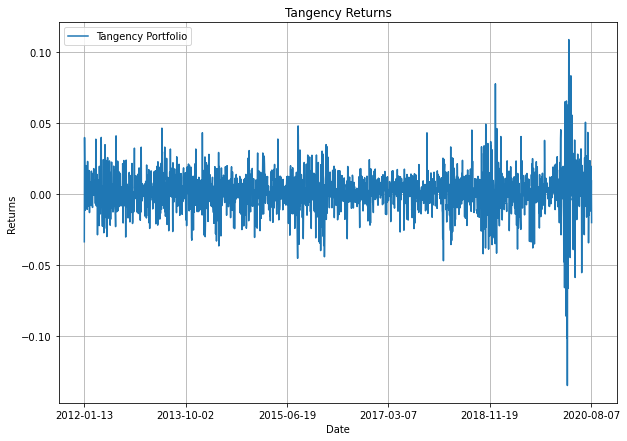

In [18]:
#Returns of Tangency Portfolio only
x = r.iloc[:,0]
plt.rcParams["figure.figsize"] = (10,7)
plt.plot(x, r['Tang'], label = 'Tangency Portfolio')
plt.xticks([r['Date'][i] for i in range(0, len(r['Date']), len(r['Date'])//5)])
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.title('Tangency Returns')
plt.grid(True)
plt.show()

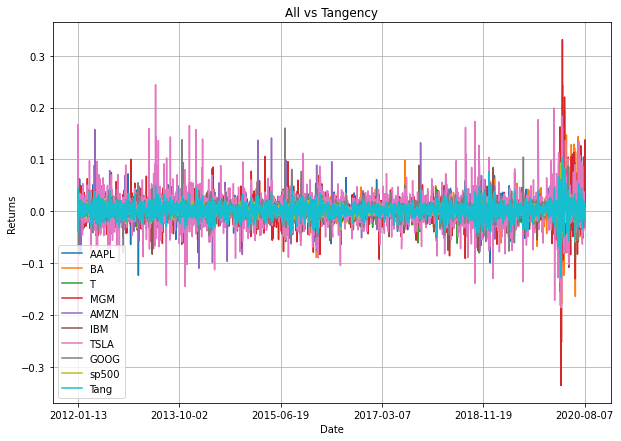

In [825]:
#Tangency vs All
plot(r, 'All vs Tangency', 'Returns')

In [19]:
#Final Dataframe
f = pd.DataFrame()
f['Returns'] = returns
f['Volatility'] = vols
f['Sharp Ratios'] = s_ratios
f.head()

,Returns,Volatility,Sharp Ratios
0,0.233330,0.012051,19.362223
1,0.203737,0.014319,14.228602
2,0.200228,0.012203,16.408104
3,0.224354,0.013807,16.249619
4,0.225555,0.013192,17.097462


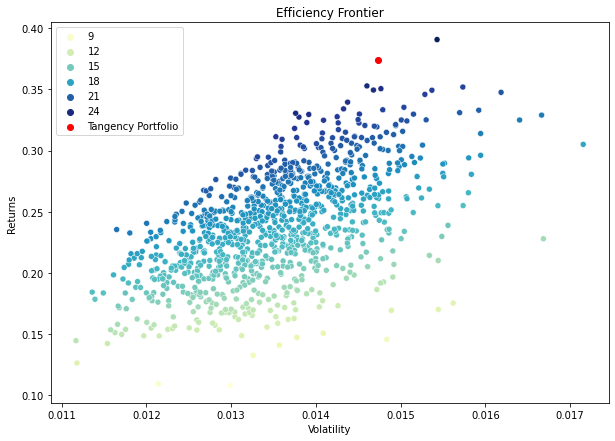

In [20]:
sb.scatterplot(data = f, x = 'Volatility', y = 'Returns', hue = 'Sharp Ratios', palette = 'YlGnBu', legend = 'brief')
plt.scatter(opt_risk_1, opt_return_1, color = 'r', label = 'Tangency Portfolio')
plt.title('Efficiency Frontier')
plt.legend()
plt.show()

# Task 6.1

In [21]:
data = pd.read_csv('Data_PCLab1_Stock.csv')
r = returns_f(data)

In [52]:
def opt_weights(m, target):
    cov_matrix = np.array(m.cov())
    m = np.array(m)
    cons = [{'type': 'eq', 'fun' : lambda w: w.sum() - 1}, {'type':'eq', 'fun': lambda w: (1 + (w*m).sum(axis = 1).mean())**252 - 1 - target}]
    #{'type':'ineq', 'fun': lambda w: -w}
    return sp.optimize.minimize(lambda w: np.sqrt(np.dot(np.dot(w.T, cov_matrix), w)), x0 = [1/9]*9, constraints = cons)

In [56]:
#Example
tang_weights = opt_weights(r.iloc[:,1:], 0.10)['x']
print(opt_weights(r.iloc[:,1:], 0.0010)['x'])
print(opt_weights(r.iloc[:,1:], 0.0010)['fun'])
print(np.sqrt(np.dot(np.dot(tang_weights.T, cov_matrix), tang_weights))) #Std
print((1 + (tang_weights*r.iloc[:, 1:]).sum(axis = 1).mean())**252 - 1) #Constraint 1
print(opt_weights(r.iloc[:,1:], 0.0010)['x'].sum()) #Constraint 2

[-0.10344275 -0.12630215  0.27977259 -0.09570526 -0.08976657  0.1413596
 -0.054115   -0.01706289  1.06526243]
0.010084589195626313
0.009595294897481526
0.09999999829108042
0.9999999999999998


In [58]:
#Computation of the Efficiency Frontier
exp_returns = []
risks = []
tang_weights = []
for i in range(200):
    target = 0.1 + i*(0.4 - 0.1)/200
    exp_returns.append(target)
    risks.append((opt_weights(r.iloc[:, 1:], target)['fun']))
#(opt_weights(r.iloc[:, 1:], target)['x']*r.iloc[:, 1:]).mean(axis=0).sum()

In [59]:
n = 1000
returns = np.zeros(n)
vols = np.zeros(n)
s_ratios = np.zeros(n)
weights_all = dict()
cov_matrix = np.array(r.iloc[:,1:].cov())

for i in range(n):
    weights = np.random.uniform(100, size=9)
    weights /= weights.sum()
    weights_all[i] = weights
    returns1 = (weights*r.iloc[:,1:]).sum(axis = 1)
    returns[i] = (1 + returns1.mean())**252 - 1
    vols[i] = np.sqrt(np.dot(np.dot(weights.T, cov_matrix), weights))
    s_ratios[i] = (returns[i]-rf)/vols[i]

In [60]:
#Final Dataframe
f = pd.DataFrame()
f['Returns'] = returns
f['Volatility'] = vols
f['Sharp Ratios'] = s_ratios
f.head()

,Returns,Volatility,Sharp Ratios
0,0.289977,0.014916,19.441163
1,0.245926,0.013340,18.434957
2,0.334191,0.014573,22.932160
3,0.231617,0.014937,15.505752
4,0.219830,0.013292,16.538097


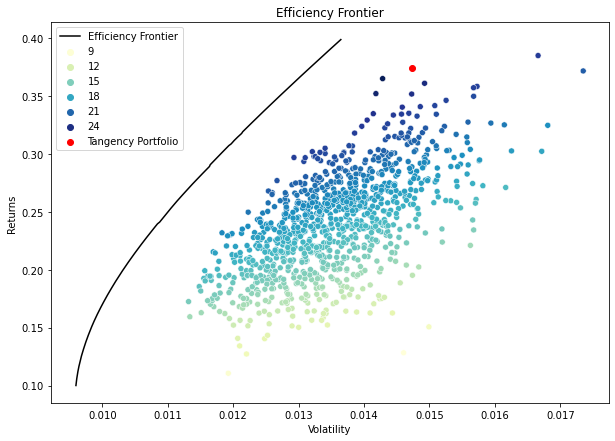

In [61]:
sb.scatterplot(data = f, x = 'Volatility', y = 'Returns', hue = 'Sharp Ratios', palette = 'YlGnBu', legend = 'brief')
plt.scatter(opt_risk_1, opt_return_1, color = 'r', label = 'Tangency Portfolio')
plt.plot(risks, exp_returns, color = 'black', label = 'Efficiency Frontier')
plt.title('Efficiency Frontier')
plt.legend()
plt.show()

# Task 7

In [62]:
data = pd.read_csv('Data_PCLab1_Stock.csv')

In [67]:
for i in range(len(data['Date'])):
    data.loc[data.index[i], 'year'] = int(data.loc[data.index[i], 'Date'][0:4])
    
d1 = data.loc[data['year'] <= 2016, :]
d1 = d1.drop('year', axis = 1)
r = returns_f(d1)

In [68]:
stocks = r.columns[1:]
avgs = np.zeros(9)
stds = np.zeros(9)
for i in range(9):
    avgs[i] = r[r.columns[i+1]].mean()
    stds[i] = r[r.columns[i+1]].std()
rf = 0 #06/10/2022

In [69]:
#Variance Covariance Matrix
cov_matrix = pd.DataFrame()
for i in range(9):
    for j in range(9):
        cov_matrix.loc[stocks[i], stocks[j]] = cov(r[stocks[i]], r[stocks[j]])

In [70]:
#Optimal Portfolio (1st part)

n = 1000
returns = np.zeros(n)
vols = np.zeros(n)
s_ratios = np.zeros(n)
weights_all = dict()

for i in range(n):
    weights = np.random.uniform(100, size=9)
    weights /= weights.sum()
    weights_all[i] = weights
    returns1 = (weights*r.iloc[:,1:]).sum(axis = 1)
    returns[i] = (1 + returns1.mean())**252 - 1
    for j in range(9):
        for k in range(9):
            vols[i] += weights[j]*weights[k]*cov_matrix.iloc[j,k]
    vols[i] = np.sqrt(vols[i])
    s_ratios[i] = (returns[i]-rf)/vols[i]

In [71]:
print('The maximum sharp ratio is', max(s_ratios))
print('The associated weights are', weights_all[list(s_ratios).index(max(s_ratios))])
tang_w = weights_all[list(s_ratios).index(max(s_ratios))]
for i in range(len(r['Date'])):
    r.loc[r.index[i], 'Tang'] = (tang_w*r.iloc[i, 1:10]).sum()

The maximum sharp ratio is 25.93909077020486
The associated weights are [0.02571941 0.25149636 0.06872833 0.08322066 0.26882411 0.00686587
 0.21676161 0.00783052 0.07055313]


In [72]:
print('The optimal return is', returns[list(s_ratios).index(max(s_ratios))])
print('The optimal risk is', vols[list(s_ratios).index(max(s_ratios))])
opt_return_1 = returns[list(s_ratios).index(max(s_ratios))]
opt_risk_1 = vols[list(s_ratios).index(max(s_ratios))]

The optimal return is 0.3347273325582707
The optimal risk is 0.01290435873499305


In [74]:
print((1 + r['Tang'].mean())**252 - 1)
print(r['Tang'].std())

0.3347273325582707
0.0129095235775993


In [75]:
#Second DataFrame
d2 = data.loc[data['year'] > 2016, :]
d2 = d2.drop('year', axis = 1)
r2 = returns_f(d2)

In [76]:
r2 = r2.reset_index(drop = True)
r2.head()

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2017-01-04,-0.001119,0.010512,-0.005811,-0.000678,0.004657,0.012381,0.046085,0.000967,0.005722
1,2017-01-05,0.005085,0.000567,-0.002806,-0.003055,0.030732,-0.003309,-0.001057,0.009048,-0.000771
2,2017-01-06,0.011148,0.002457,-0.031184,0.005107,0.019912,0.004920,0.009967,0.015277,0.003517
3,2017-01-09,0.009159,-0.004903,-0.012585,-0.012195,0.001168,-0.011090,0.009912,0.000620,-0.003549
4,2017-01-10,0.001009,0.004737,0.000245,0.015775,-0.001280,-0.012705,-0.006097,-0.002306,0.000000


In [77]:
for i in range(len(r2['Date'])):
    r2.loc[r2.index[i], 'Tang'] = (tang_w*r2.iloc[i, 1:10]).sum()

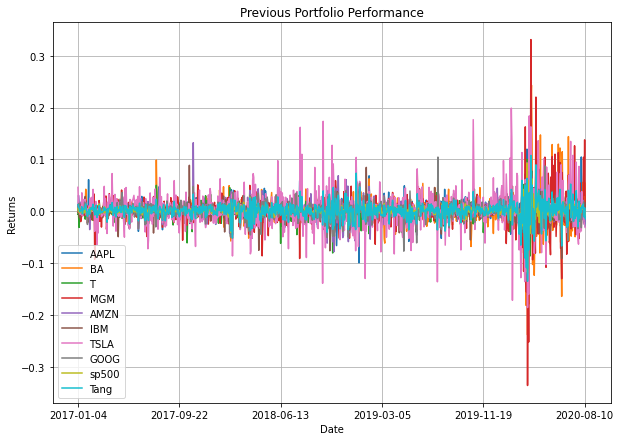

In [654]:
#Optimal Portfolio Performance
plot(r2, 'Previous Portfolio Performance', 'Returns')

In [84]:
final_stds = np.zeros(10)
final_returns = np.zeros(10)
for i in range(len(r2.columns[1:])):
    final_stds[i] = r2[r2.columns[i+1]].std()
    final_returns[i] = (1 + r2[r2.columns[i+1]].mean())**252 - 1

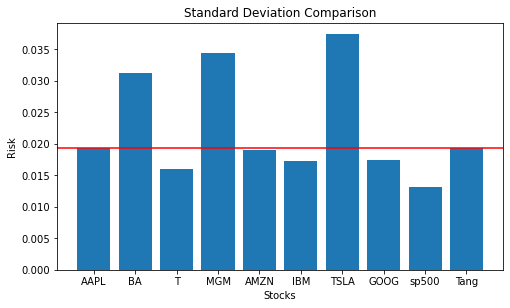

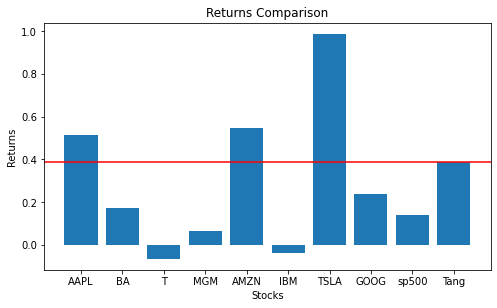

In [85]:
#2nd Part Comparison

plt.figure(figsize=(8,10))
plt.subplot(211)
plt.bar(r2.columns[1:], final_stds)
plt.axhline(final_stds[-1], color = 'r')
plt.title('Standard Deviation Comparison')
plt.xlabel('Stocks')
plt.ylabel('Risk')
plt.show()

plt.figure(figsize=(8,10))
plt.subplot(212)
plt.bar(r2.columns[1:], final_returns)
plt.axhline(final_returns[-1], color = 'r')
plt.title('Returns Comparison')
plt.xlabel('Stocks')
plt.ylabel('Returns')
plt.show()

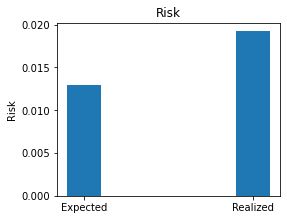

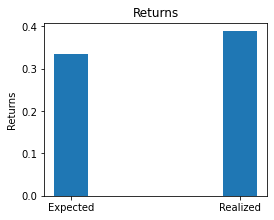

In [86]:
plt.figure(figsize=(4,7))
plt.subplot(211)
plt.bar(['Expected', 'Realized'], [opt_risk_1, final_stds[-1]], width = 0.2)
plt.title('Risk')
plt.ylabel('Risk')
plt.show()

plt.figure(figsize=(4,7))
plt.subplot(212)
plt.bar(['Expected', 'Realized'], [opt_return_1, final_returns[-1]], width = 0.2)
plt.title('Returns')
plt.ylabel('Returns')
plt.show()

In [89]:
#Optimal Portfolio (2nd part)
stocks = r2.columns[1:]
avgs = np.zeros(9)
stds = np.zeros(9)
for i in range(9):
    avgs[i] = r2[r2.columns[i+1]].mean()
    stds[i] = r2[r2.columns[i+1]].std()
rf = 0 #06/10/2022

cov_matrix = pd.DataFrame()
for i in range(9):
    for j in range(9):
        cov_matrix.loc[stocks[i], stocks[j]] = cov(r2[stocks[i]], r2[stocks[j]])
    
n = 1000
returns = np.zeros(n)
vols = np.zeros(n)
s_ratios = np.zeros(n)
weights_all = dict()

for i in range(n):
    weights = np.random.uniform(100, size=9)
    weights /= weights.sum()
    weights_all[i] = weights
    returns1 = (weights*r2.iloc[:,1:10]).sum(axis = 1)
    returns[i] = (1 + returns1.mean())**252 - 1
    for j in range(9):
        for k in range(9):
            vols[i] += weights[j]*weights[k]*cov_matrix.iloc[j,k]
    vols[i] = np.sqrt(vols[i])
    s_ratios[i] = (returns[i]-rf)/vols[i]

In [90]:
print('The maximum sharp ratio is', max(s_ratios))
print('The associated weights are', weights_all[list(s_ratios).index(max(s_ratios))])
tang2_w = weights_all[list(s_ratios).index(max(s_ratios))]

The maximum sharp ratio is 25.39130448660152
The associated weights are [0.32359938 0.03828358 0.06702377 0.06387994 0.09523133 0.05085834
 0.2997258  0.03005004 0.03134781]


In [91]:
print('The optimal return is', returns[list(s_ratios).index(max(s_ratios))])
print('The optimal risk is', vols[list(s_ratios).index(max(s_ratios))])
opt_return_2 = returns[list(s_ratios).index(max(s_ratios))]
opt_risk_2 = vols[list(s_ratios).index(max(s_ratios))]

The optimal return is 0.4862969702835851
The optimal risk is 0.01915210660169879


In [92]:
for i in range(len(r2['Date'])):
    r2.loc[r2.index[i], 'Tang2'] = (tang2_w*r2.iloc[i, 1:10]).sum()

In [93]:
print((1 + r2['Tang2'].mean())**252 - 1)
print(r2['Tang2'].std())

0.4862969702835851
0.019162673282007076


In [94]:
#Final DataFrame
f = pd.DataFrame()
f['Returns'] = returns
f['Volatility'] = vols
f['Sharp Ratios'] = s_ratios
f.head()

,Returns,Volatility,Sharp Ratios
0,0.267930,0.017126,15.644676
1,0.243508,0.016056,15.165966
2,0.221905,0.016264,13.643689
3,0.228677,0.017308,13.212440
4,0.348172,0.018293,19.032678


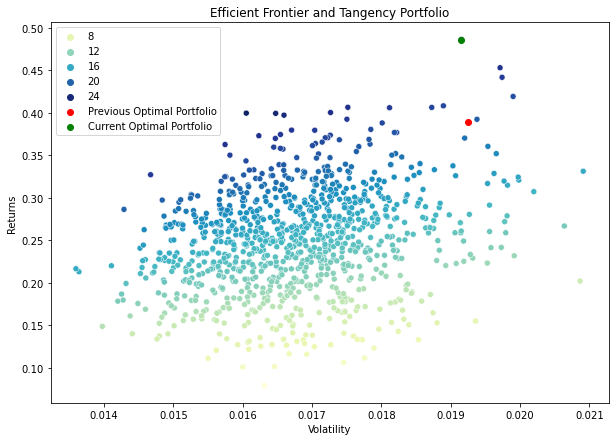

In [96]:
sb.scatterplot(data = f, x = 'Volatility', y = 'Returns', hue = 'Sharp Ratios', palette = 'YlGnBu', legend = 'brief')
plt.scatter(r2['Tang'].std(), (1 + r2['Tang'].mean())**252 - 1, color = 'r', label = 'Previous Optimal Portfolio')
plt.scatter(opt_risk_2, opt_return_2, color = 'g', label = 'Current Optimal Portfolio')
plt.legend()
plt.title('Efficient Frontier and Tangency Portfolio')
plt.show()

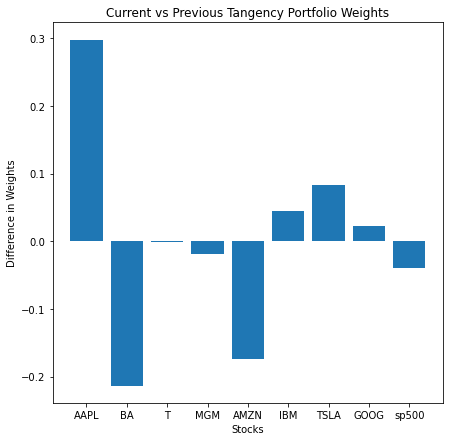

In [97]:
plt.figure(figsize = (7,7))
plt.bar(r2.columns[1:10], tang2_w - tang_w)
plt.xlabel('Stocks')
plt.ylabel('Difference in Weights')
plt.title('Current vs Previous Tangency Portfolio Weights')
plt.show()

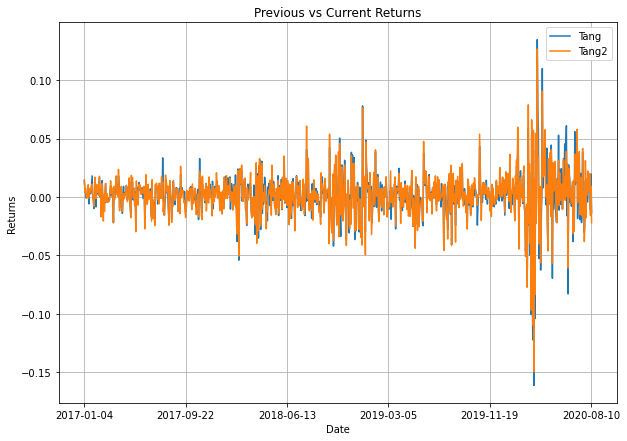

In [98]:
plot(r2[['Date', 'Tang', 'Tang2']], 'Previous vs Current Returns', 'Returns')

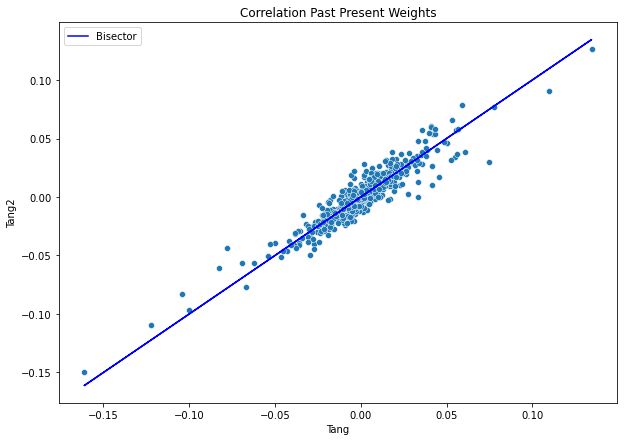

The correlation between current and previous optimal returns is 0.9350962551287311


In [99]:
sb.scatterplot(data = r2[['Date', 'Tang', 'Tang2']], x = 'Tang', y = 'Tang2', legend = 'brief')
plt.plot(r2['Tang'], r2['Tang'], color = 'b', label = 'Bisector')
plt.title('Correlation Past Present Weights')
plt.legend()
plt.show()
print('The correlation between current and previous optimal returns is', r2['Tang'].corr(r2['Tang2']))